# Why the binning affects the limit.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [2]:
import numpy as np

def generate_power_law_sample(alpha, x_min, size=1):
    # Generate uniform random numbers
    u = np.random.uniform(0, 1, size)
    # Apply the inverse CDF transformation
    samples = x_min * (1 - u) ** (-1 / (alpha - 1))
    return samples

# Parameters
alpha = 3  # Exponent parameter of the power-law distribution
e_min = 1.0  # Minimum energy

## Generate random background 

Text(0, 0.5, 'Counts')

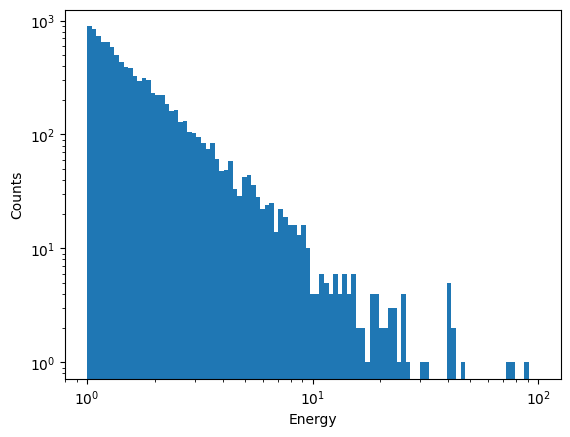

In [3]:
# Generate samples
bkg_events = generate_power_law_sample(alpha, e_min, 10000)

plt.hist(bkg_events, np.geomspace(1, 100, 100))
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Energy")
plt.ylabel("Counts")

## Convert the histogram to the probability density function (PDF) to compute p$_{b}$ in the following likelihood function

$\log{\mathcal{L}(\langle\sigma v\rangle; \mathbf{\mathcal{B}})} = N_{off} \log{\mathcal{B}}-\mathcal{S}-(1+\alpha)\mathcal{B}+\sum_{i=1}^{N_{on}}{\log{(\alpha \mathcal{B}\,p_{b}(E_i) + \mathcal{S}\,p_{s}(E_i))}}$

Text(0, 0.5, 'Probability density function')

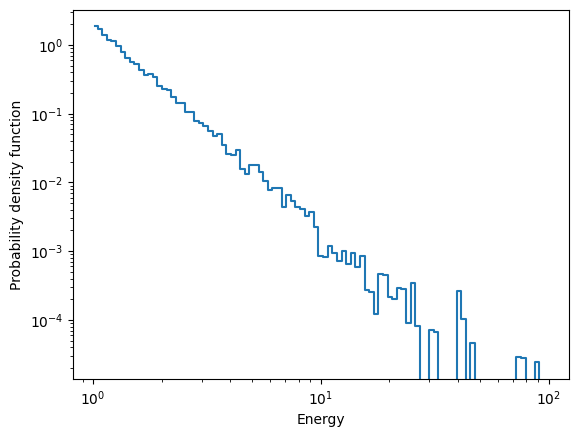

In [4]:
y, x = np.histogram(bkg_events, np.geomspace(1, 100, 100), density=True)
x_cnt = (x[1:]+x[:-1])/2
plt.step(x_cnt, y, where="mid")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Energy")
plt.ylabel("Probability density function")

## Compute the likelihood for sample events

In [5]:
sample = generate_power_law_sample(alpha, 10, 10) # consider 10 high-energy events (set min energy to 10)

In [6]:
likelihood = interp1d(x_cnt, y)
p1 = likelihood(sample)
print(p1)

[9.56202087e-04 4.60468524e-04 9.36274284e-04 1.85840507e-04
 8.29890341e-04 9.50693728e-04 7.24707000e-04 3.42735086e-06
 0.00000000e+00 3.61526328e-04]


## Let's change the binning

Text(0, 0.5, 'Probability density function')

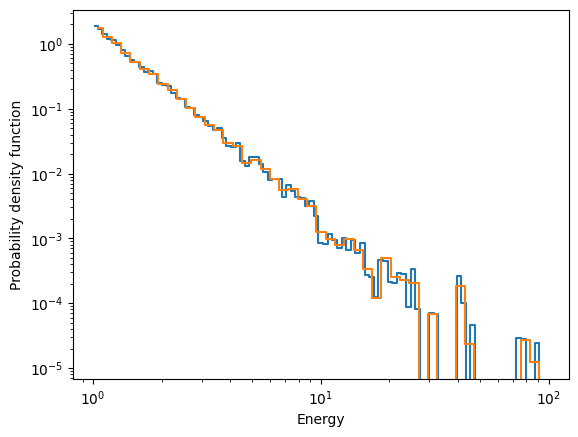

In [7]:
y2, x2 = np.histogram(bkg_events, np.geomspace(1, 100, 50), density=True)
x_cnt2 = (x2[1:]+x2[:-1])/2
likelihood = interp1d(x_cnt2, y2)
plt.step(x_cnt, y, where="mid")
plt.step(x_cnt2, y2, where="mid")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Energy")
plt.ylabel("Probability density function")


## Compute likelihood with a different bin and compare them.

In [8]:
likelihood = interp1d(x_cnt2, y2)
p2 = likelihood(sample)
print(p2)

[8.52772953e-04 3.57364144e-04 1.07938784e-03 1.86002354e-04
 1.16500466e-03 8.86679727e-04 7.33117567e-04 3.03800989e-05
 4.32242557e-06 3.78465416e-04]


Text(0, 0.5, 'Likelihood with a binsize of 50')

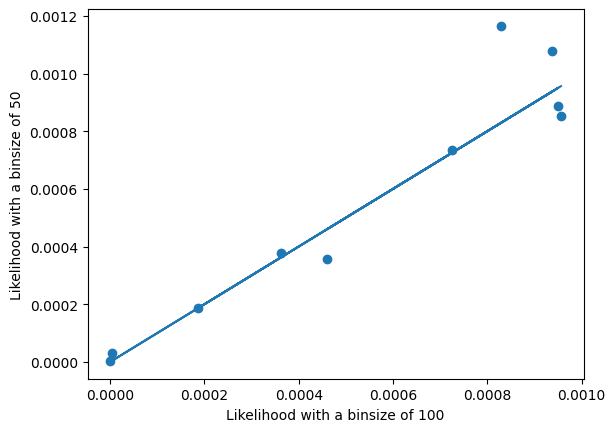

In [9]:
plt.scatter(p1, p2)
plt.plot(p1,p1)
plt.xlabel("Likelihood with a binsize of 100")
plt.ylabel("Likelihood with a binsize of 50")